# Maze Generation using Binary Tree

In [11]:
import time

import numpy as np
import matplotlib.pyplot as pyplot
from numpy.random import randint, shuffle, seed

In [12]:
def render(maze, shape, colored_pillars=False):
    """Prepares maze with walls
    """
    # corner pillars between adjacent rooms
    if colored_pillars:
        for i in range(1, shape[0]-1, 2):
            for j in range(1, shape[1]-1, 2):
                maze[i, j] = 3
    # build some walls
    maze = np.insert(maze, shape[1], 1, axis=1)
    maze = np.insert(maze, 0, 1, axis=1)
    maze = np.insert(maze, shape[0], np.ones(shape[1]+2), axis=0)
    maze = np.insert(maze, 0, np.ones(shape[1]+2), axis=0)
    return maze
    

def generate_maze(width=100, height=50, bias="NW"):
    """Using binary tree to generate a perfect base
    Has a string diagonal bias NE, NW, SE, SW
    
    Algo:
    1. pick a diagonal bias
    2. start at (0, 0) NE corner then choose a random diagonal neighbour and remove edge
    3. repeat 2 for all cells
    """
    seed(int(time.time()))
    shape = ((height // 2) * 2 + 1, (width // 2) * 2 + 1) # only odd shapes
    maze = np.ones(shape)
    for y in range(0, shape[0], 2):
        for x in range(0, shape[1], 2):
            maze[y, x] = 0
            neighbours = [] 
            if bias == "NW": # northwest bias
                if y > 0: 
                    neighbours.append((x, y-2))
                if x > 0:
                    neighbours.append((x-2, y))
            elif bias == "NE": # northeast bias
                if y > 0: 
                    neighbours.append((x, y-2))
                if x < shape[1] - 1:
                    neighbours.append((x+2, y))
            elif bias == "SW": # southwest bias
                if y < shape[0] - 1: 
                    neighbours.append((x, y+2))
                if x < shape[1] - 1:
                    neighbours.append((x+2, y))
            elif bias == "SE":
                if y < shape[0] - 1: 
                    neighbours.append((x, y+2))
                if x > 0:
                    neighbours.append((x-2, y))
            if neighbours:
                shuffle(neighbours)
                neighbour = neighbours[0]
                nx, ny = neighbour
                maze[ny, nx] = 0 # marking neighbour as visited and carve block
                # carve passage between neighbour and current cell
                maze[ny + (y - ny) // 2, nx + (x - nx) // 2] = 0
    return maze, shape

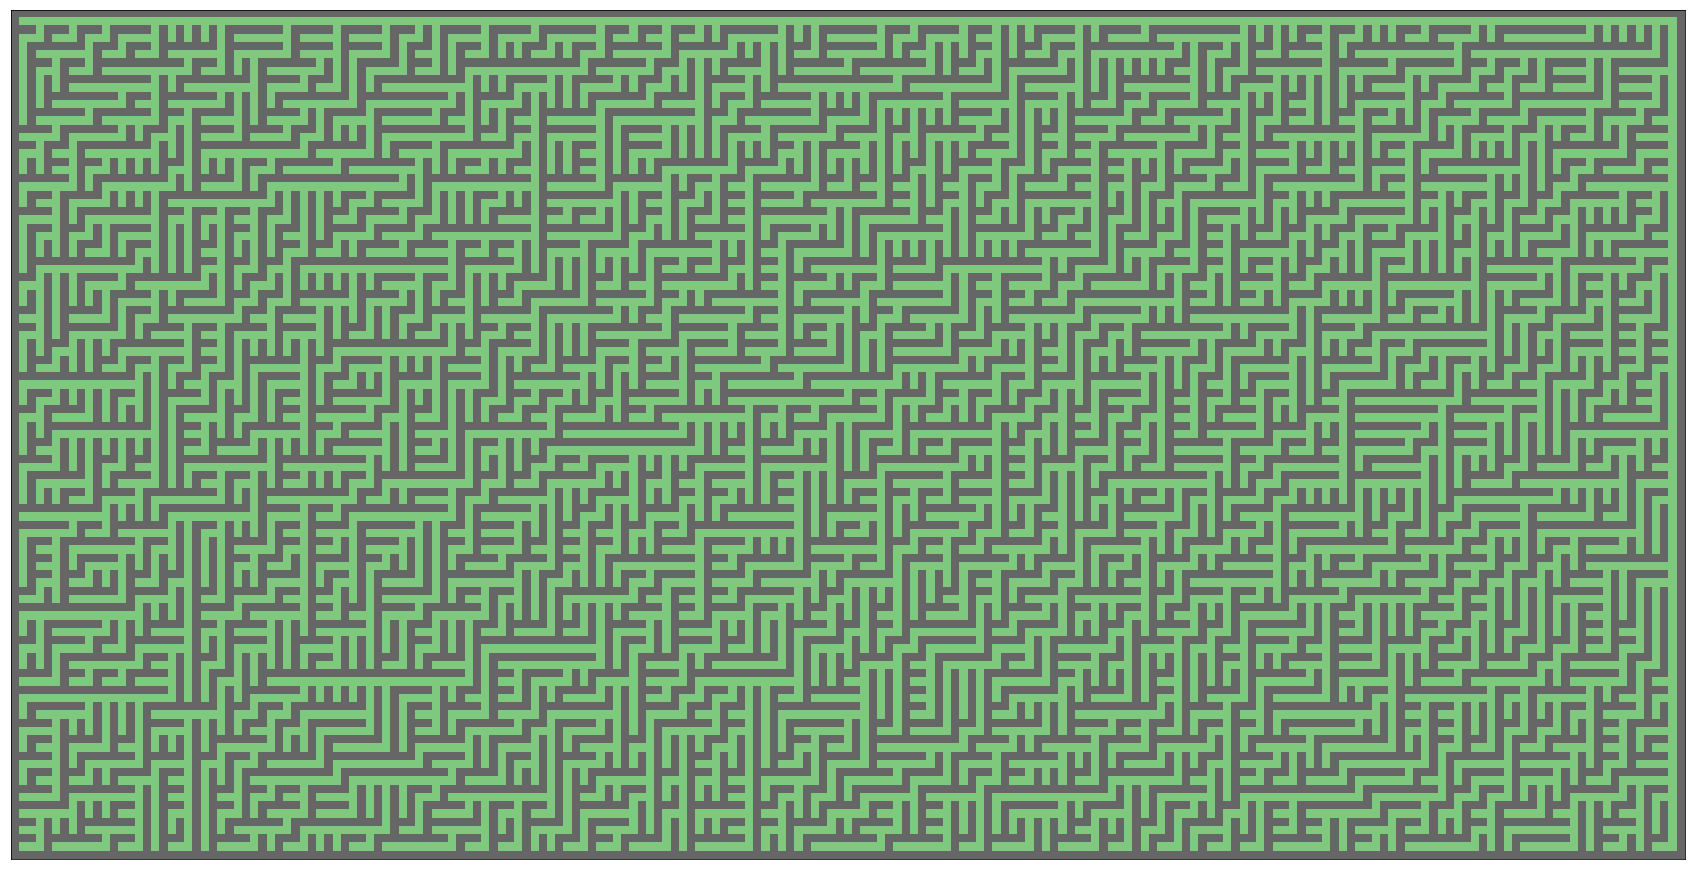

In [13]:
%matplotlib inline
maze, shape = generate_maze(200, 100, bias="NE")
for_render = render(maze, shape)
pyplot.figure(figsize=(30, 20))
pyplot.imshow(for_render, cmap=pyplot.get_cmap('Accent'), interpolation='nearest')
pyplot.xticks([]), pyplot.yticks([])
pyplot.show()